Initial stationarity test:
ADF Statistic: -0.13291441061439802
p-value: 0.9460598368757788
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339

Stationarity test after differencing:
ADF Statistic: -6.31799928782649
p-value: 3.116016884128325e-08
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339


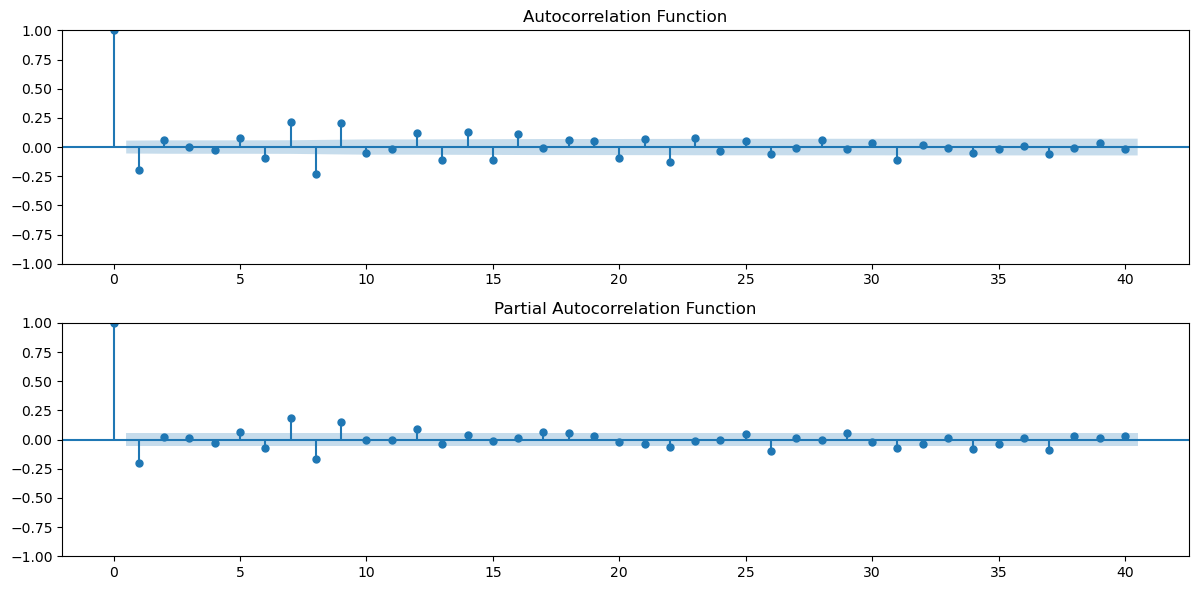

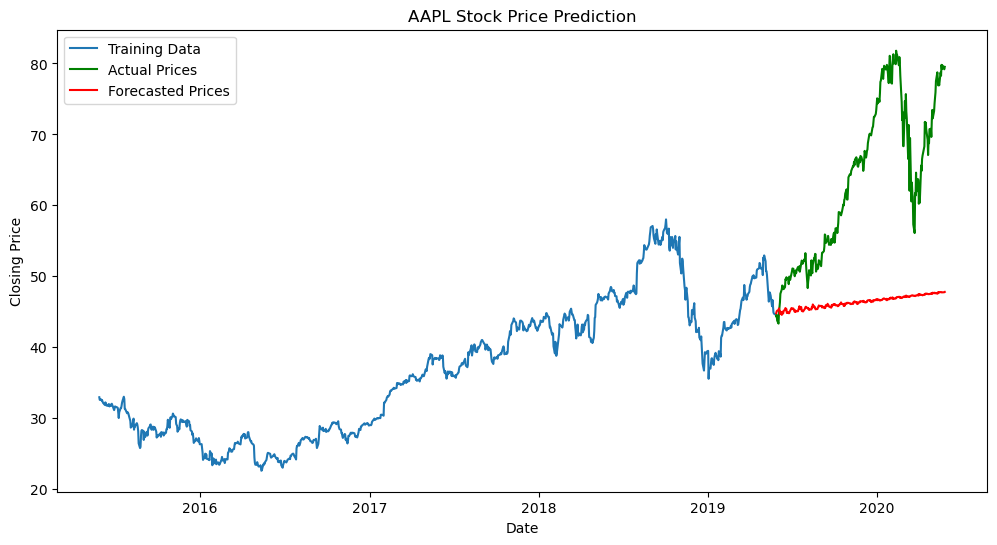

(387.9784720239432, 19.697169137313697)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file_path = r"C:\Users\dubey\Downloads\AAPL.csv"  
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
data = data['Close']

# Check stationarity function
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Initial stationarity test
print("Initial stationarity test:")
test_stationarity(data)

# Differencing if not stationary
data_diff = data.diff().dropna()
print("\nStationarity test after differencing:")
test_stationarity(data_diff)

# Plot of ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Preprocess the data
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#close_prices = df['Close']

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# ARIMA Model
model = ARIMA(train_data, order=(19, 2, 23)) 
fitted_model = model.fit()

forecast_steps = len(test_data)
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices', color='green')
plt.plot(test_data.index, forecast, label='Forecasted Prices', color='red')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# performance metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

mse, rmse
